In [4]:
import numpy as np

In [5]:

import pandas as pd

In [6]:
import plotly.express as px

<div style="background-color:Orange; padding: 20px; border-radius: 8px;font-size:12px;font-weight:8px">
  <h1 style="color: #333;"><strong>EXPLORATORY DATA ANALYSIS</strong></h1>
</div>


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings as w
w.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

<div style="background-color:Orange; padding: 20px; border-radius: 8px;font-size:12px;font-weight:8px">
  <h1 style="color: #333;"><strong>GET A DATASET AND CLEANING PROCESS</strong></h1>
</div>


In [8]:
#loading the dataset
df = pd.read_csv(r"D:\Employee (1).csv")
df.sample(5)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
1577,Bachelors,2015,Bangalore,3,25,Male,No,3,0
4053,Bachelors,2013,Pune,3,25,Female,Yes,3,1
3199,Bachelors,2017,Pune,3,31,Male,Yes,0,0
2341,PHD,2014,Bangalore,3,27,Male,No,5,0
4427,Masters,2013,New Delhi,3,33,Female,No,2,0


In [9]:
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [11]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


<div style="background-color:Orange; padding: 20px; border-radius: 8px;font-size:12px;font-weight:8px">
  <h1 style="color: #333;"><strong>FIND NULL VALUES</strong></h1>
</div>


In [12]:
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [13]:
education_stream=df["Education"].value_counts()

In [14]:
education_stream

Education
Bachelors    3601
Masters       873
PHD           179
Name: count, dtype: int64

In [15]:
df["JoiningYear"].value_counts()

JoiningYear
2017    1108
2015     781
2014     699
2013     669
2016     525
2012     504
2018     367
Name: count, dtype: int64

In [16]:
fresher=(df["ExperienceInCurrentDomain"]== 0)

In [17]:
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [18]:
df["City"].value_counts()

City
Bangalore    2228
Pune         1268
New Delhi    1157
Name: count, dtype: int64

<div style="background-color:Orange; padding: 20px; border-radius: 8px;font-size:12px;font-weight:8px">
  <h1 style="color: #333;"><strong>AGE DISTRIBUTION OF EMPLOYEES</strong></h1>
</div>


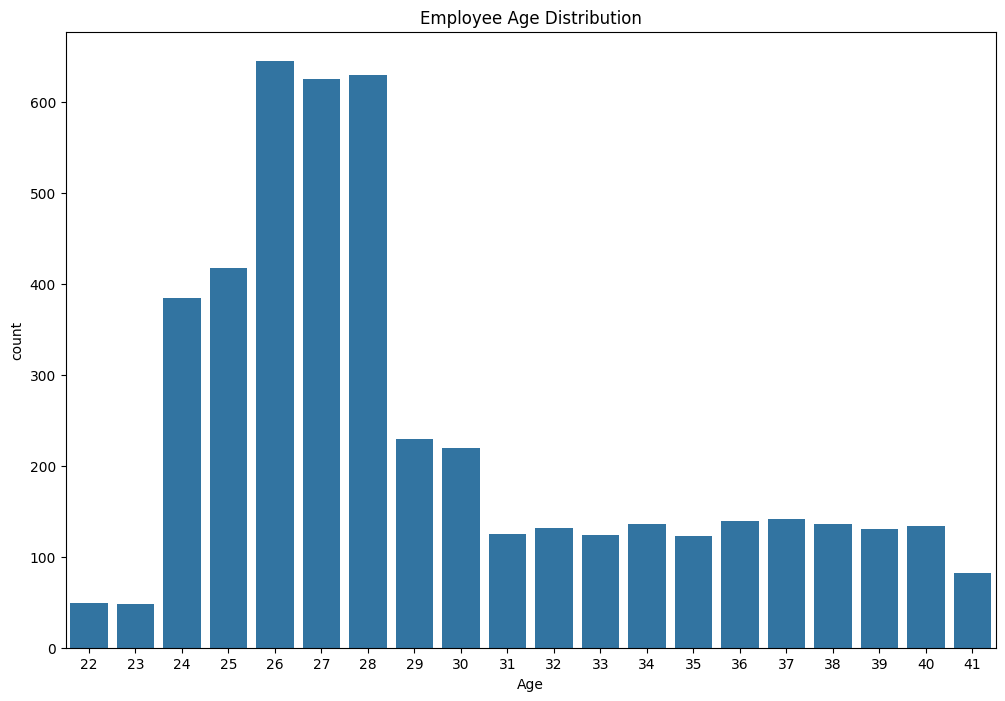

In [19]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,x="Age")

plt.title("Employee Age Distribution")
plt.show()


## 1️⃣ Employee Age Distribution (Countplot) ##

** Shows the number of employees across different age groups.**

** Helps identify whether the workforce is younger (20s–30s) or more experienced (40+).**

** Useful for workforce planning and succession strategies.**

<div style="background-color:Orange; padding: 20px; border-radius: 8px;font-size:12px;font-weight:8px">
  <h1 style="color: #333;"><strong>AVERAGE AGE OF EMPLOYEES</strong></h1>
</div>


In [20]:
df["Age"].max()

np.int64(41)

In [21]:
df["Age"].min()

np.int64(22)

In [22]:
df["Age"].mean()

np.float64(29.393294648613796)

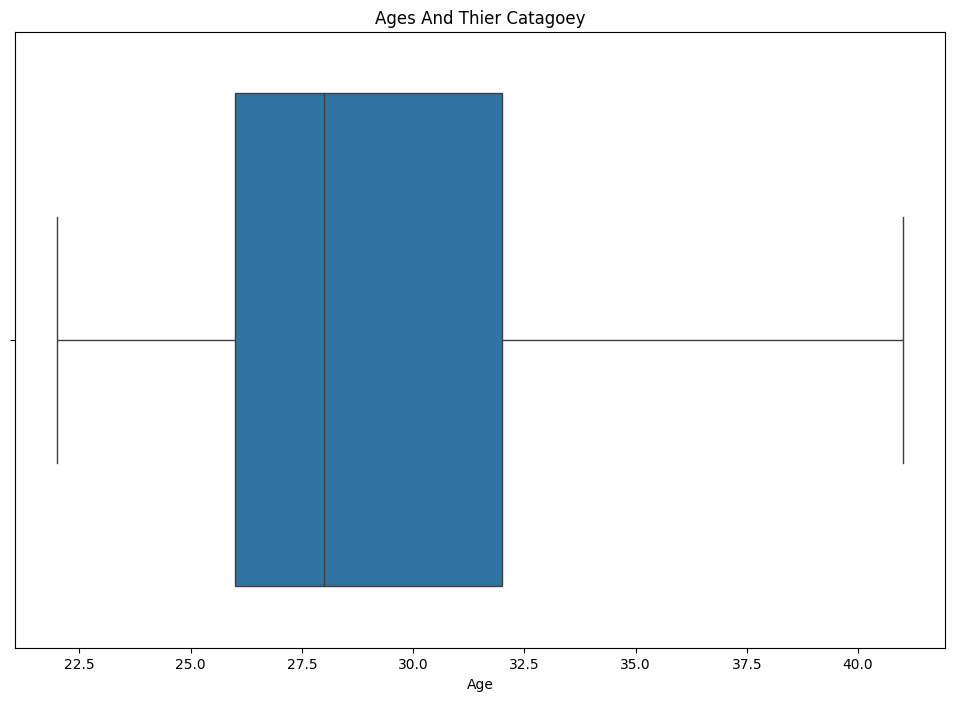

In [23]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df,x="Age")
plt.title("Ages And Thier Catagoey")

plt.show()


## 2️⃣ Age Spread (Boxplot) ##

** Displays the distribution of ages with median, quartiles, and outliers.**

** Outliers highlight very young or very senior employees compared to the majority.**

** Useful for understanding diversity in age.**

<div style="background-color:Orange; padding: 20px; border-radius: 8px;font-size:12px;font-weight:8px">
  <h1 style="color: #333;"><strong>HIGHER EDUCATION OF EMPLOYEES AND RATIO </strong></h1>
</div>


In [24]:
df["Education"].value_counts()

Education
Bachelors    3601
Masters       873
PHD           179
Name: count, dtype: int64

In [25]:
gender=df['Education'].value_counts().reset_index()

px.pie(data_frame=gender,names='Education',values='count')

## 3️⃣ Education Distribution (Pie Chart) ##

** Represents the percentage of employees based on their education qualification.**

** Helps HR check if most employees are graduates, postgraduates, or diploma holders.**

** Important for recruitment and training program design.**

<div style="background-color:Orange; padding: 20px; border-radius: 8px;font-size:12px;font-weight:8px">
  <h1 style="color: #333;"><strong>MALES AND FEMALES WITH EVERBENCH OR NOT</strong></h1>
</div>


In [26]:
df["Gender"].value_counts()

Gender
Male      2778
Female    1875
Name: count, dtype: int64

<Axes: xlabel='EverBenched', ylabel='count'>

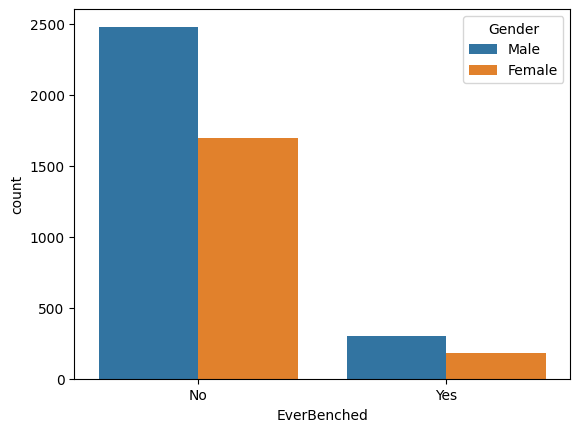

In [27]:
sns.countplot(data=df,x='EverBenched',hue="Gender")

## 4️⃣ Ever Benched vs Gender (Countplot) ##

** Compares male vs female employees who have been benched (not assigned to projects).**

** Useful to check fairness in project allocation.**

** Can highlight skill gaps or bias in deployment.**

<div style="background-color:Orange; padding: 20px; border-radius: 8px;font-size:12px;font-weight:8px">
  <h1 style="color: #333;"><strong>PAYMENT TIER AND RATIO</strong></h1>
</div>


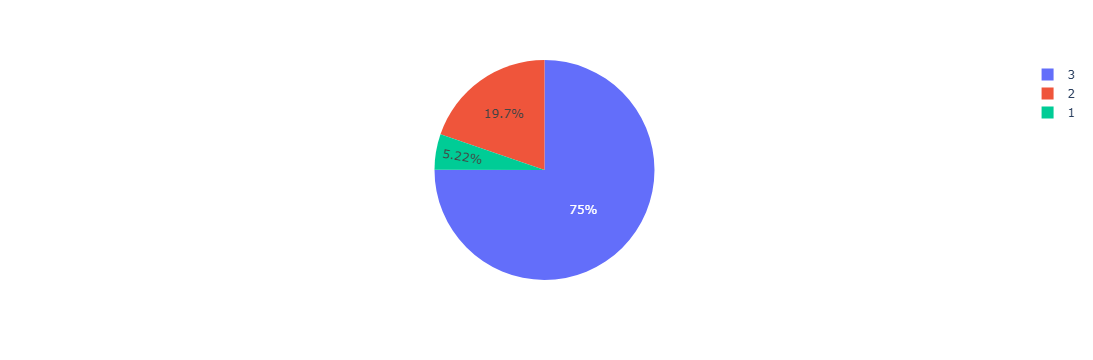

In [28]:
tier=df["PaymentTier"].value_counts().reset_index()
px.pie(data_frame=tier,names="PaymentTier",values='count')

## 5️⃣ Payment Tier Distribution (Pie Chart) ##

** Shows the proportion of employees in different salary/payment tiers.**

** If most employees are in lower tiers, retention could be a challenge.**

** If higher tiers dominate, the company has a strong high-skilled workforce.**

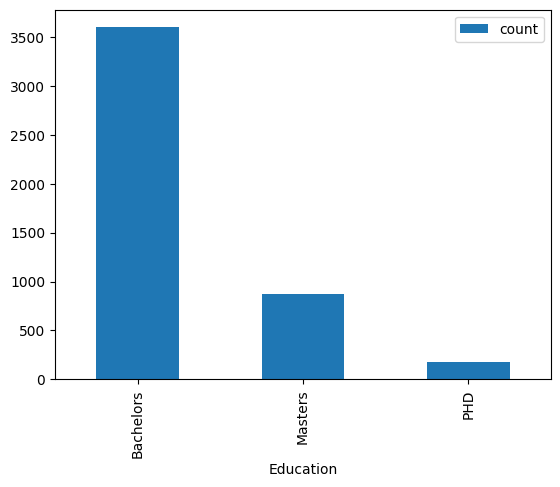

In [29]:
import matplotlib.pyplot as plt

gender.plot(kind='bar', x='Education', y='count')
plt.show()


## 6️⃣ Education Levels (Bar Chart) ##

** Same data as the education pie chart but in bar format for easier category comparison.**

** Quickly shows which education level is most common.**

<Axes: title={'center': 'Experience Domain and Leave or Not'}, xlabel='ExperienceInCurrentDomain', ylabel='count'>

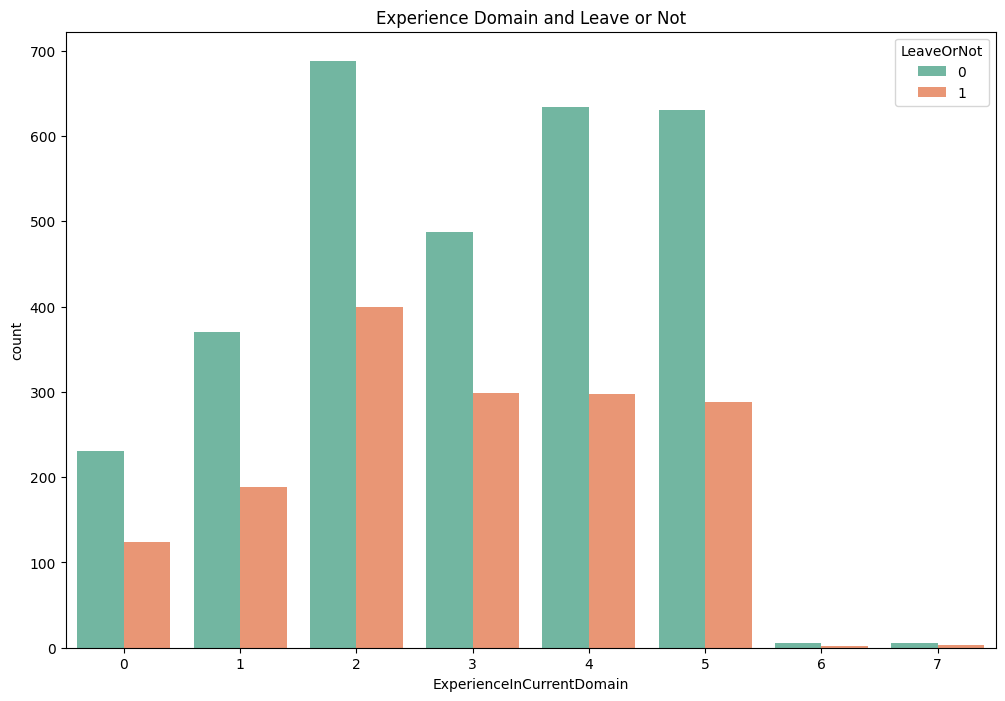

In [30]:
plt.figure(figsize=(12,8))
plt.title("Experience Domain and Leave or Not")
sns.countplot(data=df,x='ExperienceInCurrentDomain',hue='LeaveOrNot',palette='Set2')


## 7️⃣ Experience in Current Domain vs Leave or Not (Countplot) ##

** Shows the relationship between domain experience and attrition (leaving the company).**

** If less experienced employees leave more, it may signal dissatisfaction.**

** If highly experienced employees leave, company may have growth or career development issues.**

In [31]:
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


<div style="background-color:Orange; padding: 20px; border-radius: 8px;font-size:12px;font-weight:8px">
  <h1 style="color: #333;"><strong>EMPLOYEE JOINING AND WHICH CITY</strong></h1>
</div>


Text(0.5, 1.0, 'joining with city name ')

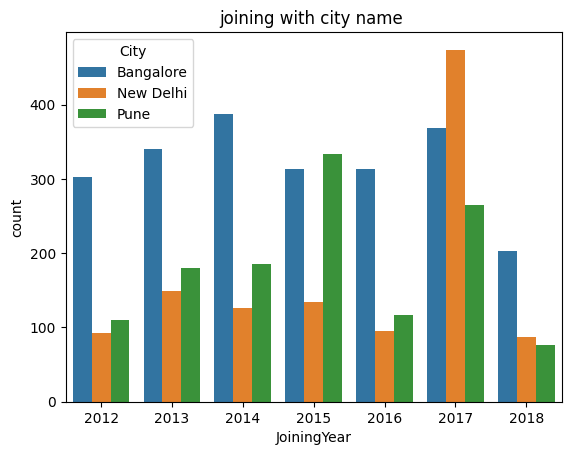

In [32]:
sns.countplot(data=df,x="JoiningYear",hue="City")
plt.title('joining with city name ')

## 8️⃣ Joining Year vs City (Countplot) ##

** Shows employee joining trends over the years across different cities.**

** Helps identify expansion patterns and which locations saw the most hiring.**

**  Useful for city-specific workforce strategy.**

